In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import pickle
from math import log
from generate_patients import Pacient
from IPython.core.display import display, HTML
from matplotlib.colors import BoundaryNorm, Normalize

In [2]:
display(HTML("<style>.container { width:90% !important; }</style>"))
plt.interactive(True)
%matplotlib inline
plt.rcParams['figure.figsize'] = [26, 6]

In [3]:
def normalize(a):
    x = np.log(a)
    return np.array((x - np.min(x)) / (np.max(x) - np.min(x)))

In [4]:
patients = []
try:
    with open('patients.obj', 'rb') as patients_file:
        patients = pickle.load(patients_file)

except Exception as e:
    print('ERROR: ' + str(e))
    
print(len(patients))

79


In [5]:
n = 3  # Patient number

# Print patient's features
print('ID: ' + patients[n].features[0])
print('pse: ' + patients[n].features[1])
print('psp1: ' + patients[n].features[2])
print('psp2: ' + patients[n].features[3])
print('psp3: ' + patients[n].features[4])
print('pspf1: ' + patients[n].features[5])
print('pspf2: ' + patients[n].features[6])
print('pspf3: ' + patients[n].features[7])
print('wpsp: ' + patients[n].features[8])
print('cpt: ' + patients[n].features[9])

ID: 004
pse: 6.313455505844891
psp1: 5.093545015923192
psp2: 0.4335673813176543
psp3: 0.36647457527435506
pspf1: 11
pspf2: 7
pspf3: 1
wpsp: 50.93545015923192
cpt: 0.03706279567774473


# Whole data

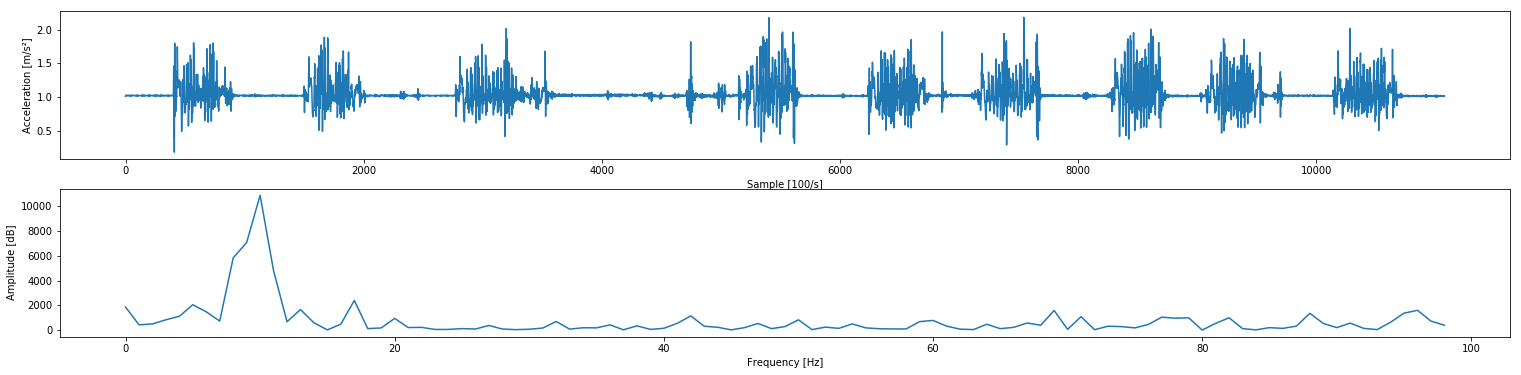

In [6]:
plt.subplot(211)
plt.plot(patients[n].data)
plt.ylabel('Acceleration [m/s²]')
plt.xlabel('Sample [100/s]')

plt.subplot(212)
plt.plot(patients[n].fft)
plt.ylabel('Amplitude [dB]')
plt.xlabel('Frequency [Hz]')

plt.show()

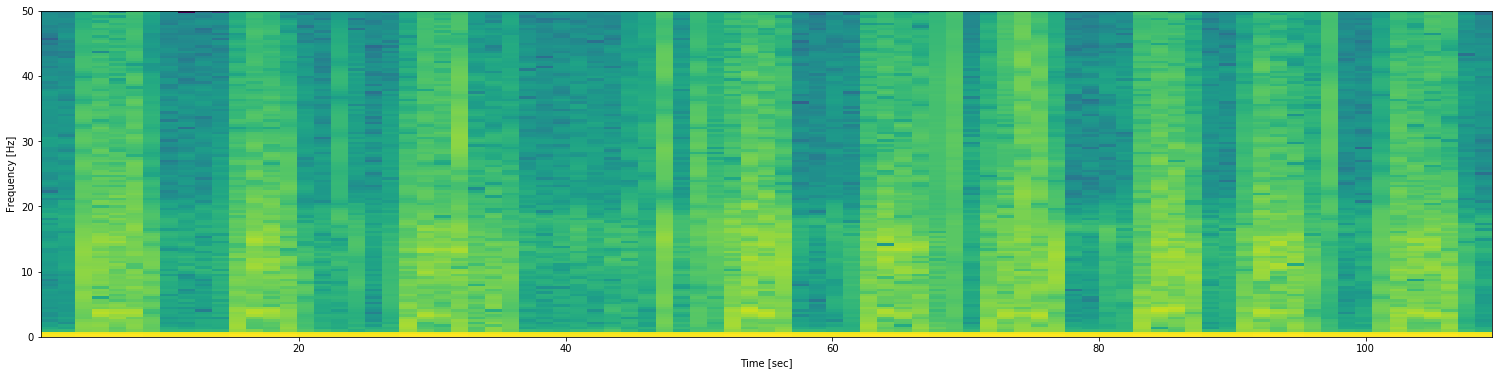

In [7]:
plt.specgram(patients[n].data, Fs=100)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

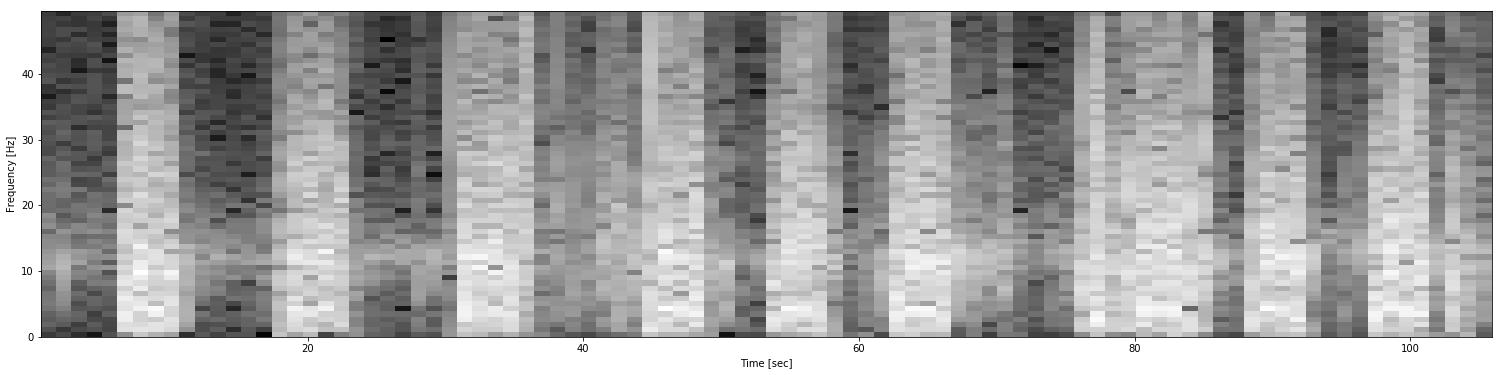

In [8]:
f, t, Sxx = signal.spectrogram(patients[0].data, fs=100, nperseg=127)

plt.pcolormesh(t, f, np.log(Sxx), cmap="gray", norm=Normalize.autoscale(Normalize, Sxx))
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

1.0
0.0


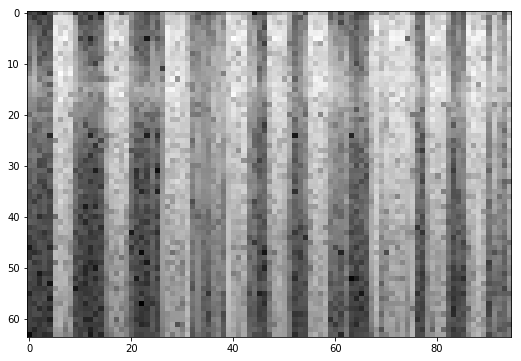

In [9]:
a = normalize(Sxx)
print(np.max(a))
print(np.min(a))
plt.imshow(a, cmap='gray')
plt.show()

In [10]:
x = []
y = []
specgrams = []
for patient in patients:
    _, _, Sxx = signal.spectrogram(patient.data, fs=100, nperseg=127)
    a = normalize(Sxx)
    if a.shape[1] >= 68:
        specgrams.append(a)
        y.append(a.shape[0])
        x.append(a.shape[1])

y.sort()
x.sort()
print(y)
print(x)

try:
    with open('spectrograms.obj', 'wb') as specgram_file:
        pickle.dump(specgrams, specgram_file)

except Exception as e:
    print('ERROR: ' + str(e))

[64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64, 64]
[68, 70, 71, 74, 75, 76, 76, 77, 77, 78, 78, 79, 79, 79, 80, 80, 81, 81, 81, 82, 82, 83, 84, 84, 84, 84, 85, 85, 85, 86, 86, 87, 87, 87, 88, 88, 88, 89, 89, 90, 90, 90, 90, 91, 92, 92, 92, 94, 95, 95, 95, 96, 97, 97, 98, 98, 98, 100, 100, 102, 103, 104, 106, 107, 107, 107, 108, 112, 115, 117, 118, 119, 121, 122, 128, 145, 156, 159]


# Data windows

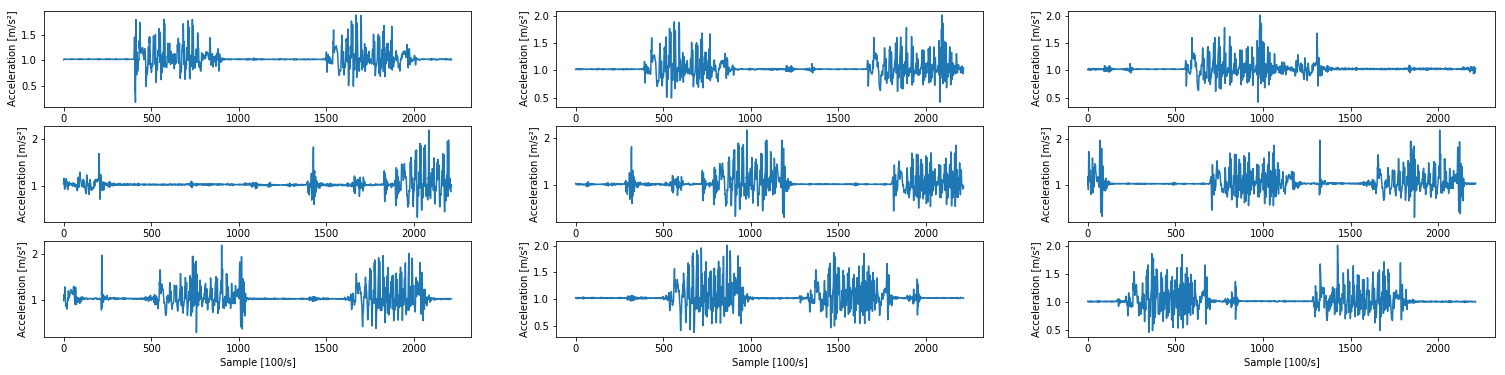

In [11]:
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.plot(patients[n].data_windows[i])
    plt.ylabel('Acceleration [m/s²]')
    plt.xlabel('Sample [100/s]')

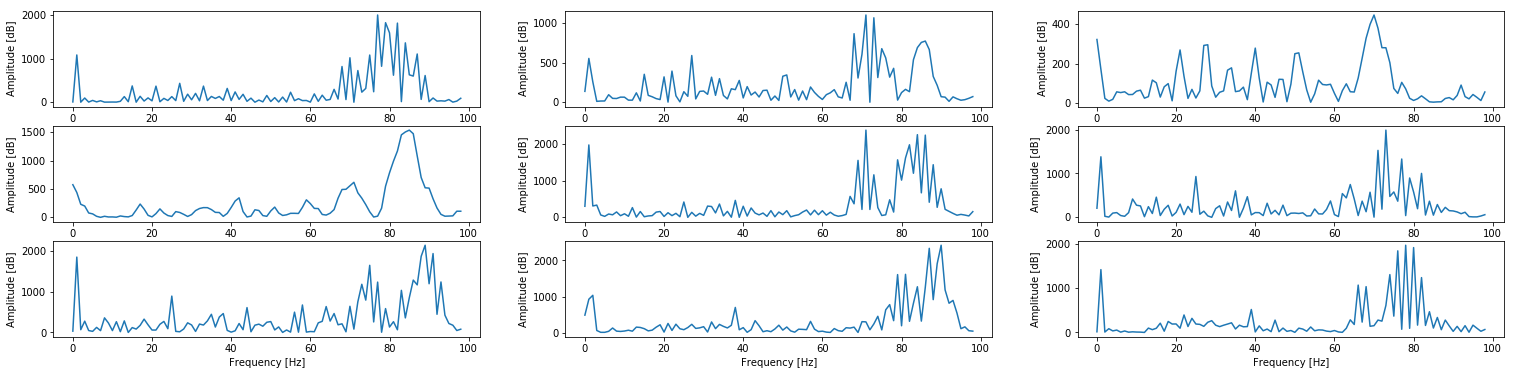

In [12]:
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.plot(patients[n].fft_windows[i])
    plt.ylabel('Amplitude [dB]')
    plt.xlabel('Frequency [Hz]')

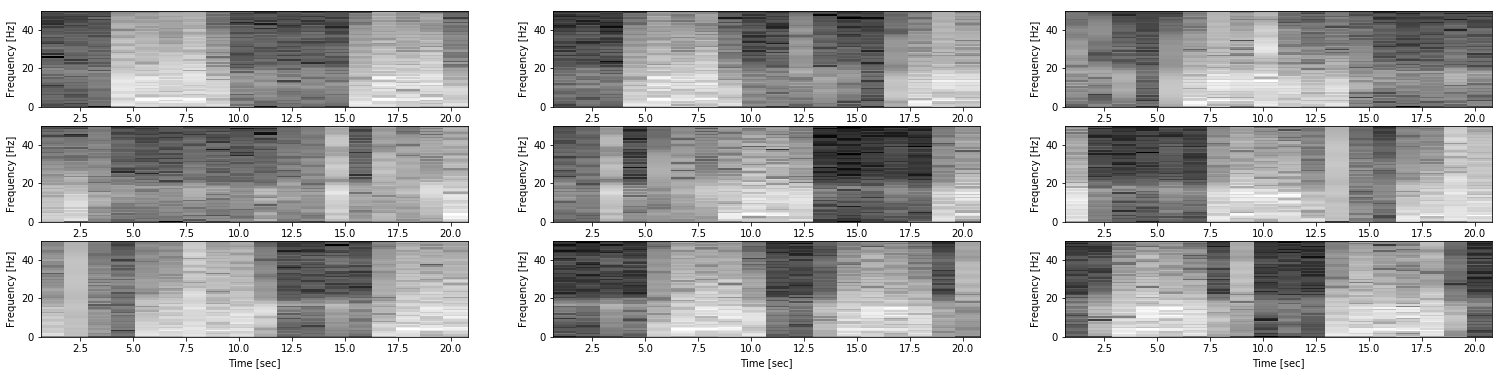

In [13]:
for i in range(9):
    plt.subplot(3, 3, i+1)
    f, t, Sxx = signal.spectrogram(patients[n].data_windows[i], fs=100, nperseg=128)
    plt.pcolormesh(t, f, np.log(Sxx), cmap="gray", norm=Normalize.autoscale(Normalize, Sxx))
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [sec]')

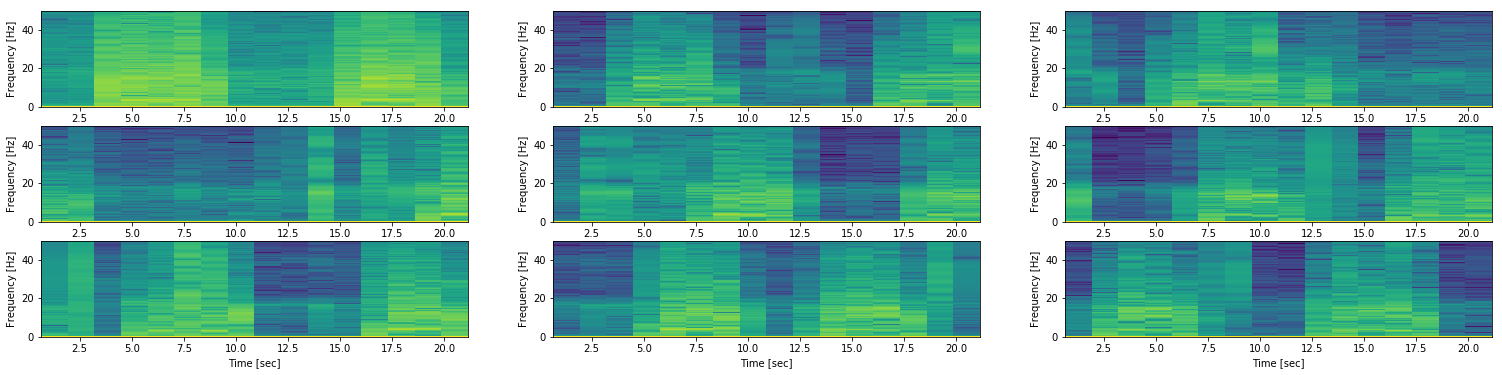

In [14]:
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.specgram(patients[n].data_windows[i], Fs=100)
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [sec]')

# Matrix

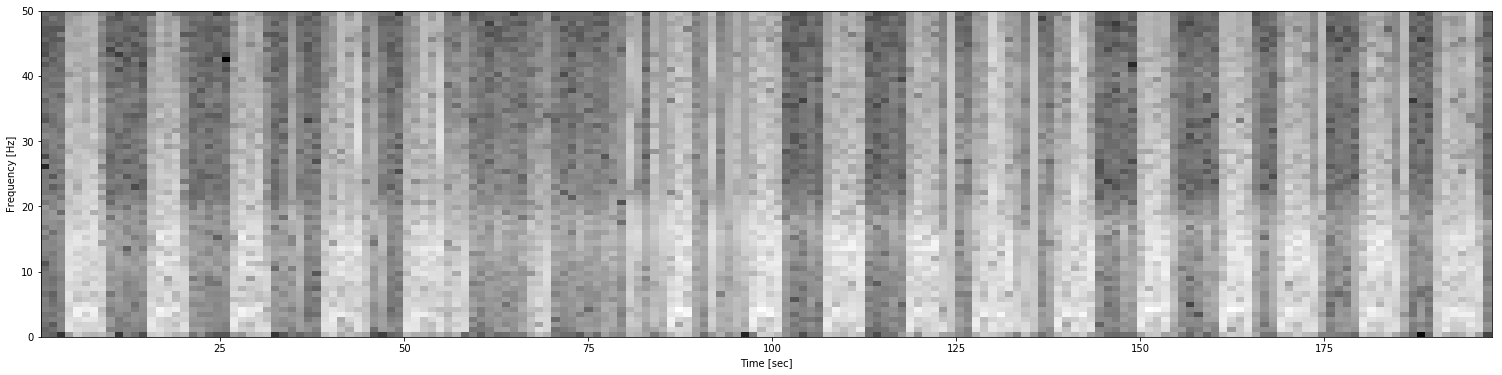

In [15]:
matrix = np.concatenate(patients[n].data_windows)
matrix = np.transpose(matrix)

f, t, Sxx = signal.spectrogram(matrix, fs=100, nperseg=128)
plt.pcolormesh(t, f, np.log(Sxx), cmap="gray", norm=Normalize.autoscale(Normalize, Sxx))
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

# Segmented TUGS (some patients have less than 9 TUGs)

In [16]:
incorrect_patients = 0
correct_patients = []
for patient in patients:
    if len(patient.tugs) != 9:
        incorrect_patients += 1
        continue
    correct_patients.append(patient)

print('Total patients: %s' % len(patients))
print('Wrong patients: %s' % incorrect_patients)
print('Valid patients: %s' % len(correct_patients))

Total patients: 79
Wrong patients: 2
Valid patients: 77


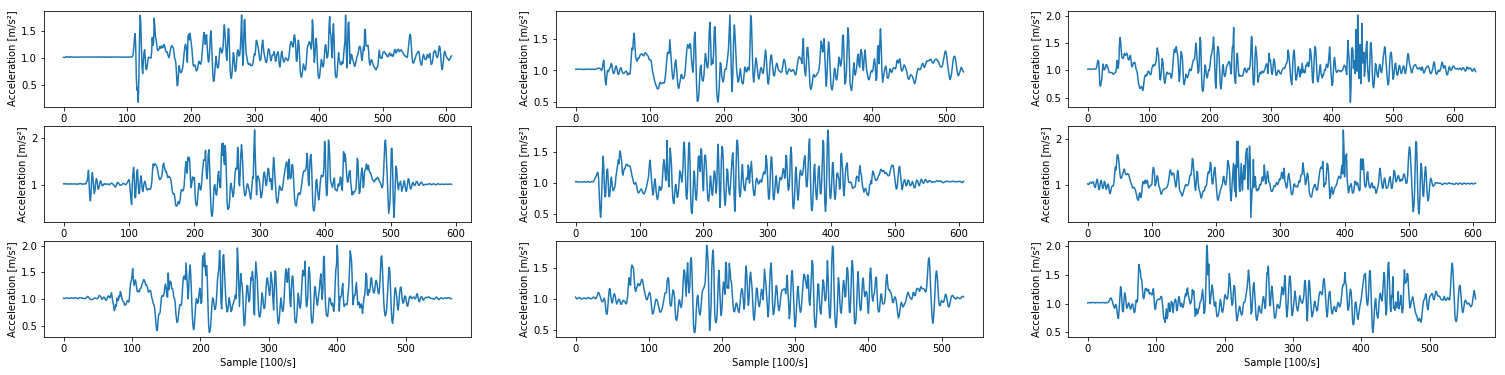

In [17]:
for i in range(9):
    tug_begin = patients[n].tugs[i][0]
    tug_end = patients[n].tugs[i][1]
    plt.subplot(3, 3, i+1)
    plt.plot(patients[n].data[tug_begin:tug_end])
    plt.ylabel('Acceleration [m/s²]')
    plt.xlabel('Sample [100/s]')

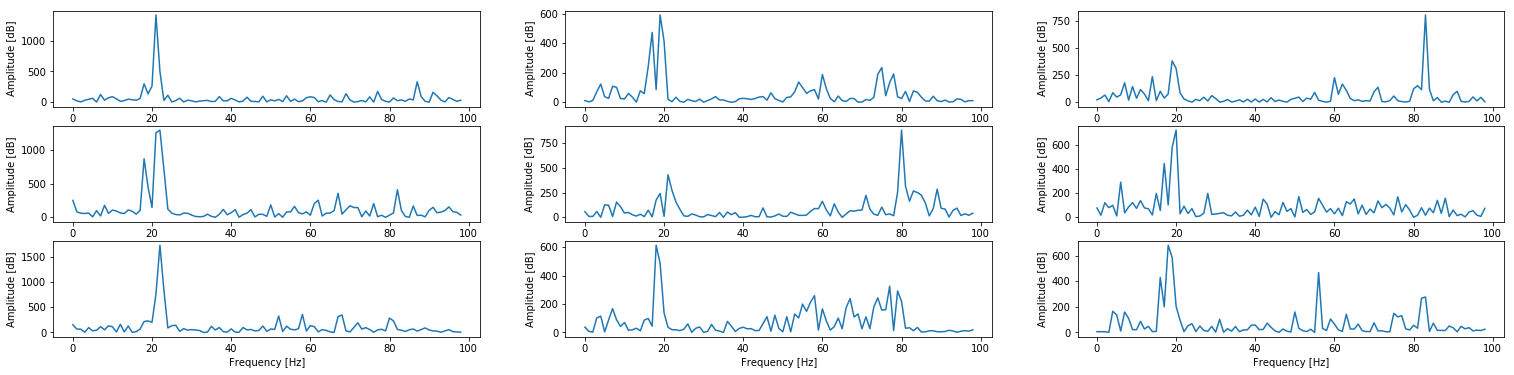

In [18]:
for i in range(9):
    tug_begin = patients[n].tugs[i][0]
    tug_end = patients[n].tugs[i][1]
    tug_fft = pow(abs(np.fft.rfft(patients[n].data[tug_begin:tug_end])), 2)[1:100]
    plt.subplot(3, 3, i+1)
    plt.plot(tug_fft)
    plt.ylabel('Amplitude [dB]')
    plt.xlabel('Frequency [Hz]')

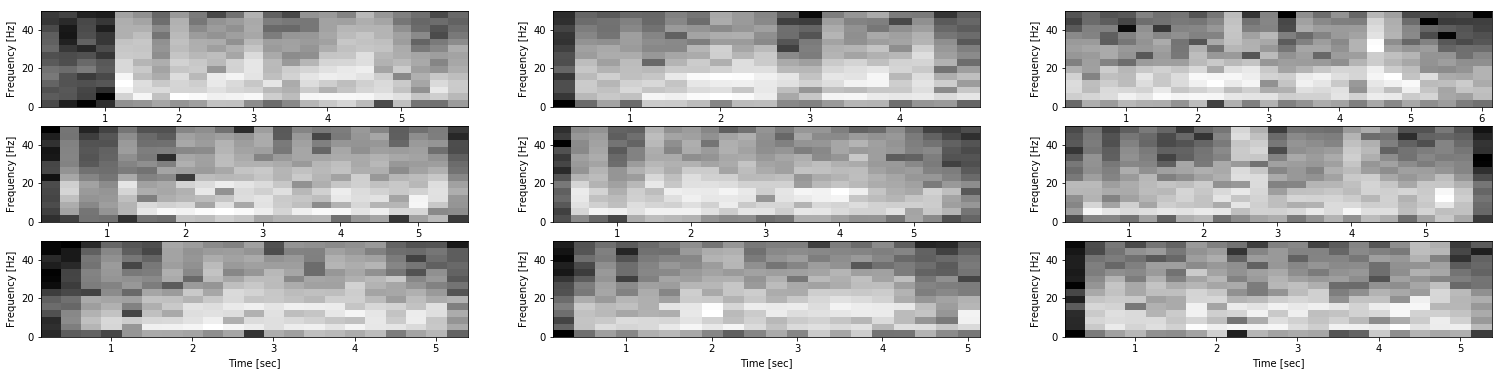

In [19]:
for i in range(9):
    tug_begin = patients[n].tugs[i][0]
    tug_end = patients[n].tugs[i][1]
    f, t, Sxx = signal.spectrogram(patients[n].data[tug_begin:tug_end], fs=100, nperseg=28)
    plt.subplot(3, 3, i+1)
    plt.pcolormesh(t, f, np.log(Sxx), cmap="gray", norm=Normalize.autoscale(Normalize, Sxx))
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [sec]')

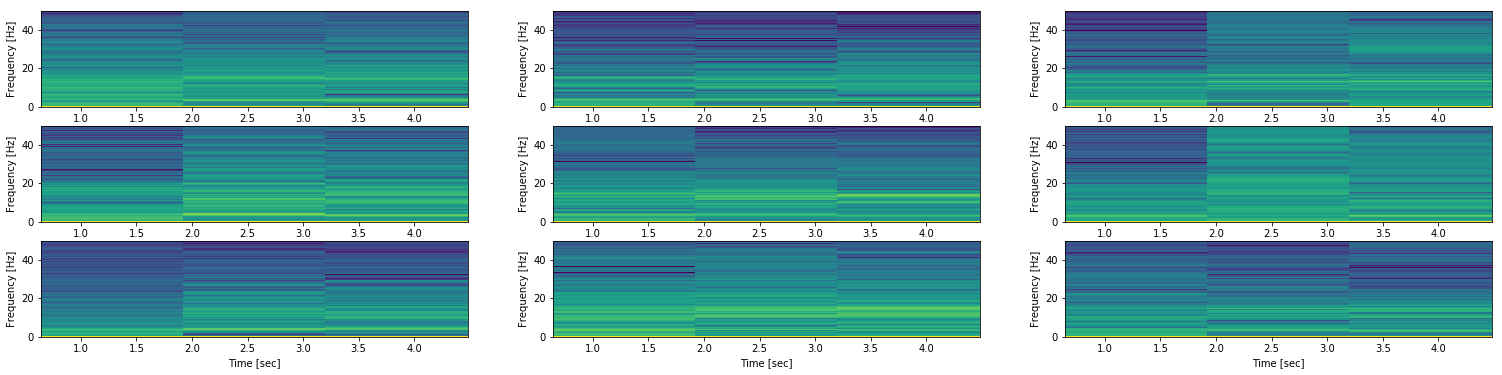

In [20]:
for i in range(9):
    tug_begin = patients[n].tugs[i][0]
    tug_end = patients[n].tugs[i][1]
    plt.subplot(3, 3, i+1)
    plt.specgram(patients[n].data[tug_begin:tug_end], Fs=100)
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [sec]')

In [21]:
x, y, specgrams = [], [], []
for patient in correct_patients:
    for i in range(9):
        tug_begin = patient.tugs[i][0]
        tug_end = patient.tugs[i][1]
        _, _, Sxx = signal.spectrogram(patient.data[tug_begin:tug_end], fs=100, nperseg=28)
        a = normalize(Sxx)
        specgrams.append(a)
        y.append(a.shape[0])
        x.append(a.shape[1])

y.sort()
x.sort()
print(y)
print(x)
print(len(specgrams))

try:
    with open('spectrograms_segmented.obj', 'wb') as specgram_file:
        pickle.dump(specgrams, specgram_file)

except Exception as e:
    print('ERROR: ' + str(e))

[15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15,

# Concatenated Segmented TUGs

Text(0.5, 0, 'Time [sec]')

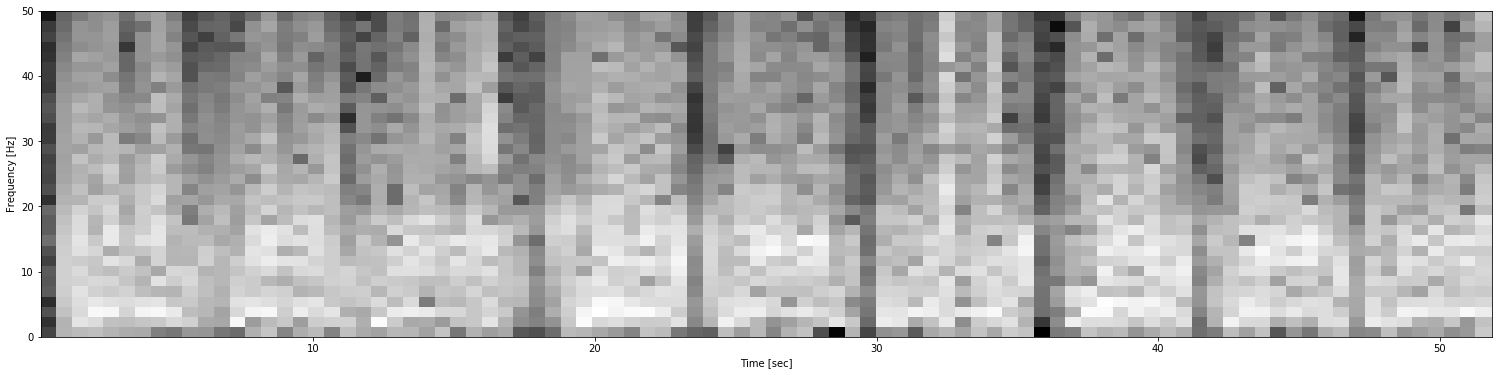

In [22]:
n = 3

concatenated = np.ndarray(0)
for i in range(9):
    tug_begin = patients[n].tugs[i][0]
    tug_end = patients[n].tugs[i][1]
    concatenated = np.append(concatenated, patients[n].data[tug_begin:tug_end])

f, t, Sxx = signal.spectrogram(concatenated, fs=100, nperseg=64)
plt.pcolormesh(t, f, np.log(Sxx), cmap="gray", norm=Normalize.autoscale(Normalize, Sxx))
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')

In [55]:
x, y, specgrams = [], [], []
for patient in correct_patients:
    concatenated = np.ndarray(0)
    for i in range(9):
        tug_begin = patient.tugs[i][0]
        tug_end = patient.tugs[i][1]
        concatenated = np.append(concatenated, patient.data[tug_begin:tug_end])
    _, _, Sxx = signal.spectrogram(concatenated, fs=100, nperseg=88)
    a = normalize(Sxx)
    specgrams.append(a)
    y.append(a.shape[0])
    x.append(a.shape[1])

y.sort()
x.sort()
print(y)
print(x)
print(len(specgrams))

try:
    with open('spectrograms_segmented_concatenated.obj', 'wb') as specgram_file:
        pickle.dump(specgrams, specgram_file)

except Exception as e:
    print('ERROR: ' + str(e))

[45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45, 45]
[45, 46, 47, 47, 48, 48, 48, 48, 49, 50, 50, 51, 52, 52, 52, 52, 52, 52, 52, 53, 53, 54, 54, 54, 55, 55, 56, 56, 56, 57, 57, 57, 58, 58, 59, 59, 60, 60, 60, 61, 61, 62, 62, 62, 63, 63, 63, 65, 65, 65, 65, 65, 66, 67, 69, 70, 70, 72, 72, 72, 72, 74, 77, 77, 78, 78, 80, 80, 83, 84, 88, 88, 95, 100, 101, 117, 119]
77
